# NYC Taxi Fare Prediction — A Deployable Linear Regression Model

> 📂 **Dataset Source**  
>  
> This project uses historical yellow taxi trip data provided by the NYC Taxi & Limousine Commission (TLC).  
> You can download the original CSV file from the official TLC data portal:  
> [Download 2017 Yellow Taxi Trip Data (CSV)](https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_data_2017.zip)  
>  
> ⚠️ **Note:** The file `2017_Yellow_Taxi_Trip_Data.csv` must be downloaded manually and placed in the same folder as this notebook in order for the code to run properly.


This project was developed as a regression case study for the NYC Taxi & Limousine Commission (TLC). 

The goal was to predict fare amounts based on historical trip data while relying solely on features available before a ride begins. The workflow included initial data exploration, feature engineering, and model development, leading to the final regression analysis and interpretation.


# NYC Taxi Fare Prediction: Building a Multiple Linear Regression Model

This project builds a multiple linear regression model to predict NYC taxi fares using pre-ride trip data.  
The workflow includes exploratory data analysis, feature engineering, assumption testing, and model evaluation.  
The goal is to develop an interpretable and deployable model that can support fare estimation in real time.

# Build a multiple linear regression model

### Step 1: Imports and data loading

This project uses pandas, numpy, seaborn, and scikit-learn for data processing and modeling.

In [40]:
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

# Add binary-encoded VendorID column
df0['VendorID_2'] = df0['VendorID'].map({1: 0, 2: 1})

**NOTE**: The NYC TLC dataset was preloaded into the notebook environment, allowing immediate access for data exploration and modeling.

In [41]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

## Exploratory Data Analysis (EDA)

EDA was conducted to identify outliers, assess distributions, and check model assumptions.

EDA helps you clean the data, understand distributions, detect outliers, and check for missing values. It also reveals which variables have a linear relationship with the target, helps identify multicollinearity between features, and guides feature selection. Basically, it makes sure your model won’t be built on a unusable foundation.

### Step 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [42]:
# Start with `.shape` and `.info()`
print(df0.shape)        # (rows, columns)
print("\n")
print(df0.info())       # Column types + null counts


(22699, 18)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  f

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [43]:
# Check for missing values per column
print(df0.isna().sum())

# Check total number of missing values
print("\nTotal missing values:", df0.isna().sum().sum())

# Check for duplicates
print("\nDuplicate rows:", df0.duplicated().sum())

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Total missing values: 0

Duplicate rows: 0


Use `.describe()`.

In [44]:
# Use .describe()
# Summary statistics of numeric columns
print(df0.describe())


         Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   
50%    5.673150e+07      2.000000         1.000000       1.610000   
75%    8.537452e+07      2.000000         2.000000       3.060000   
max    1.134863e+08      2.000000         6.000000      33.960000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     13.026629   
std        0.708391     66.633373     70.139691      0.496211     13.243791   
min        1.000000      1.000000      1.000000      1.000000 

### Step 2b. Convert pickup & dropoff columns to datetime


In [45]:
# Check data types of pickup and dropoff columns
print(df0[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes)


tpep_pickup_datetime     object
tpep_dropoff_datetime    object
dtype: object


In [46]:
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

### Step 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [47]:
# Create `duration` column in minutes
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']).dt.total_seconds() / 60

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [48]:
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Step 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

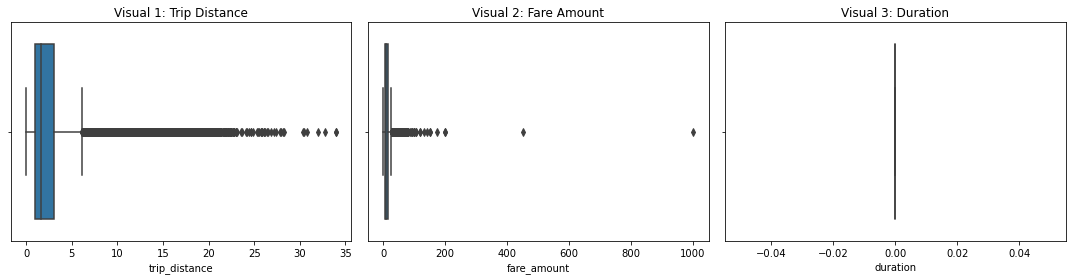

In [89]:
# Set up figure
plt.figure(figsize=(15, 4))

# Boxplot für trip_distance
plt.subplot(1, 3, 1)
sns.boxplot(x=df0['trip_distance'])
plt.title('Visual 1: Trip Distance')

# Boxplot für fare_amount
plt.subplot(1, 3, 2)
sns.boxplot(x=df0['fare_amount'])
plt.title('Visual 2: Fare Amount')

# Boxplot für duration
plt.subplot(1, 3, 3)
sns.boxplot(x=df0['duration'])
plt.title('Visual 3: Duration')

plt.tight_layout()
plt.savefig("visuals course 5/boxplots_trip_fare_duration.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

1. All three: trip_distance, fare_amount, and duration clearly show outliers based on the points far outside the whiskers.

2. The upper values are high but still within a visible range (up to ~35). They are not necessarily incorrect but should be reviewed depending on context.

3. No. Zero or negative values don’t make sense:

    - trip_distance can’t be 0 or negative

    - fare_amount should at least include the base fare

    - duration below 0 is impossible

    -> These rows should be filtered or cleaned before modeling.

### Step 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [50]:
# Check the smallest unique trip distances
print(sorted(df0['trip_distance'].drop_duplicates())[:10])

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]


Some trips report a `trip_distance` of zero, which may reflect unusual cases such as cancellations or data entry errors. These values were investigated and counted to determine if they could bias the model.

In [51]:
# Count how many rides have a trip_distance of 0
zero_distance_count = df0[df0['trip_distance'] == 0].shape[0]
print(f"Number of rides with trip_distance = 0: {zero_distance_count}")

Number of rides with trip_distance = 0: 148


#### `fare_amount` outliers

In [52]:
# Check the smallest unique fare_amount values
print(sorted(df0['fare_amount'].drop_duplicates())[:10])

# Count how many rides have a fare_amount of less than 0
negative_fare_count = df0[df0['fare_amount'] < 0].shape[0]
print(f"Number of rides with fare_amount less than 0: {negative_fare_count}")

[-120.0, -4.5, -4.0, -3.5, -3.0, -2.5, 0.0, 0.01, 1.0, 2.5]
Number of rides with fare_amount less than 0: 14


**Question:** What do you notice about the values in the `fare_amount` column?

The `fare_amount` column includes invalid entries such as negative values, which are impossible in the real-world setting and were corrected by imputing them as zero. Zero fares may reflect edge cases and were reviewed separately.


In [53]:
# Impute values less than $0 with 0
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [54]:
# Define the function for upper-limit imputation
def impute_upper_outliers(df, column_list, iqr_factor=6):
    for col in column_list:
        
        # 🔴 Reassign values < 0 to 0 (minimum threshold)
        df.loc[df[col] < 0, col] = 0

        # 🔴 Calculate upper threshold
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_threshold = Q3 + (iqr_factor * IQR)

        # 🔴 Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold

#### `duration` outliers


In [55]:
# Call .describe() for duration outliers
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [56]:
# Impute a 0 for any negative values
df0.loc[df0['duration'] < 0, 'duration'] = 0  # Reassign minimum to zero

In [57]:
# Impute the high outliers
Q1 = df0['duration'].quantile(0.25)
Q3 = df0['duration'].quantile(0.75)
IQR = Q3 - Q1
upper_threshold = Q3 + 6 * IQR  #  Calculate upper threshold

df0.loc[df0['duration'] > upper_threshold, 'duration'] = upper_threshold  #  Reassign values > threshold to threshold

### Step 3a. Feature engineering

To approximate trip distances in real time, a new feature `mean_distance` was created.  
It represents the average distance of all trips sharing the same pickup and dropoff combination.

In [58]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + " " + df0['DOLocationID'].astype(str)

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [59]:
### YOUR CODE HERE ###
grouped = df0.groupby('pickup_dropoff')['trip_distance'].mean()
print(grouped.head())

pickup_dropoff
1 1         2.433333
10 148     15.700000
100 1      16.890000
100 100     0.253333
100 107     1.180000
Name: trip_distance, dtype: float64


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [60]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()


### Step: Apply average distance mapping

The `mean_distance` column was created by mapping the previously computed average distances (`grouped_dict`) to each trip based on its unique pickup-dropoff combination. This ensures the model receives a realistic distance estimate without access to real-time duration.


In [61]:
# 1. The `mean_distance` column was created by mapping precomputed averages (`grouped_dict`) onto each trip's pickup/dropoff ID combination. This technique enables real-time distance estimation.
df0['mean_distance'] = df0['pickup_dropoff']

# 2. 
df0['mean_distance'] = df0['pickup_dropoff'].map(grouped_dict)

print(df0[['pickup_dropoff', 'trip_distance', 'mean_distance']].head(10))

  pickup_dropoff  trip_distance  mean_distance
0        100 231           3.34       3.521667
1         186 43           1.80       3.108889
2        262 236           1.00       0.881429
3         188 97           3.70       3.700000
4          4 112           4.37       4.435000
5        161 236           2.30       2.052258
6         79 241          12.83      12.830000
7        237 114           2.98       4.022500
8        234 249           1.20       1.019259
9        239 237           1.60       1.580000


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [62]:
### YOUR CODE HERE ###

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###
grouped_duration = df0.groupby('pickup_dropoff')['duration'].mean()
grouped_duration_dict = grouped_duration.to_dict()

# Confirm that it worked
### YOUR CODE HERE ###
df0['mean_duration'] = df0['pickup_dropoff'].map(grouped_duration_dict)
print(df0[['pickup_dropoff', 'duration', 'mean_duration']].head())

  pickup_dropoff   duration  mean_duration
0        100 231  14.066667      22.847222
1         186 43  26.500000      24.470370
2        262 236   7.200000       7.250000
3         188 97  30.250000      30.250000
4          4 112  16.716667      14.616667


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [63]:
# Create 'day' col
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [64]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
df0['rush_hour'] = 0


In [65]:
# Define function to determine if a row is rush hour
def rush_hourizer(row):
    weekday = row['day'] not in ['Saturday', 'Sunday']
    hour = row['tpep_pickup_datetime'].hour
    return int(weekday and (6 <= hour < 10 or 16 <= hour < 20))

In [66]:
# Apply the `rush_hourizer()` function to the new column
df0['rush_hour'] = df0.apply(rush_hourizer, axis=1)

### Step 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

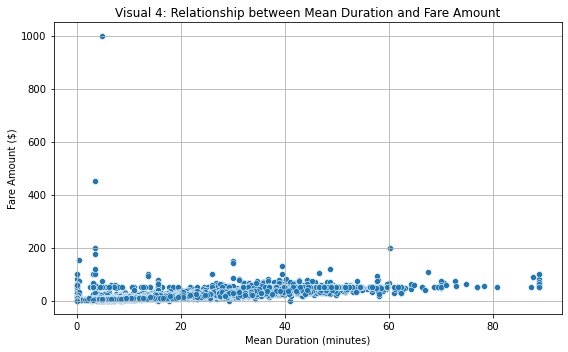

In [90]:
# Create a scatterplot to visualize the relationship between variables of interest
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df0, x='mean_duration', y='fare_amount')
plt.title('Visual 4: Relationship between Mean Duration and Fare Amount')
plt.xlabel('Mean Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.savefig("visuals course 5/duration_vs_fare_scatter.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [68]:
# Check how many rides have fare_amount = 52.0
df_52 = df0[df0['fare_amount'] == 52.0]
print(f"Number of rides with $52.00 fare: {df_52.shape[0]}")

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

Number of rides with $52.00 fare: 514


Examine the first 30 of these trips.

In [69]:
# Examine the first 30 of these trips
df_52.head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wednesday,December,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sunday,September,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,Tuesday,February,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Monday,June,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,Thursday,August,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tuesday,September,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,Sunday,April,0


**Question:** What do you notice about the first 30 trips?

Most of the trips with a fare of $52.00 are:

Long distances (often ~18–22 miles), consistent with airport flat rates (e.g. JFK ↔ Manhattan).

Have RatecodeID = 2, which indicates a negotiated fare (often flat-rate airport rides).

Some outliers: a few very short trips with 0 or very low distance also have $52.00 — likely data errors or misclassified rides.

Common pickup/dropoff combos like 132 to various zones appear often → suggests a flat-rate route.

Conclusion:
The $52.00 line represents a common flat fare, possibly JFK airport rate. But a few rows suggest possible data entry issues.

### Step 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [70]:
# Drop columns that won't be available during model deployment or are irrelevant
df_model = df0.drop(columns=[
    'Unnamed: 0',
    'VendorID',
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'duration',
    'pickup_dropoff',
    'fare_amount'  # assuming fare_amount is the target variable
])


In [71]:
# Confirm columns
print(df_model.columns)

Index(['passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'mean_distance', 'mean_duration', 'day', 'month', 'rush_hour'],
      dtype='object')


### Step 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

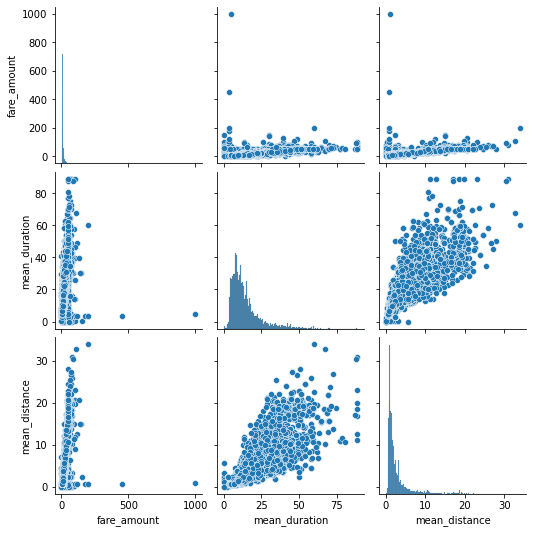

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relevante Spalten definieren
cols_for_plot = ['fare_amount', 'mean_duration', 'mean_distance']

# Sicherstellen, dass df0 existiert und die Spalten enthält
df_plot = df0[cols_for_plot].dropna()

# Pairplot erstellen
sns.pairplot(df_plot)

# Plot anzeigen
plt.show()

# Add binary-encoded VendorID column
df0['VendorID_2'] = df0['VendorID'].map({1: 0, 2: 1})

These variables all show linear correlation with each other. Investigate this further.

### Step 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [73]:
corr_features = df0[['VendorID_2', 'passenger_count', 'fare_amount', 'mean_distance', 'mean_duration', 'rush_hour']]
correlation_matrix = corr_features.corr()


Visualize a correlation heatmap of the data.

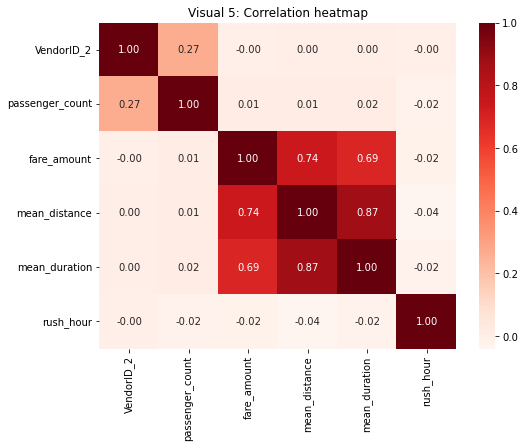

In [91]:
# VendorID_2 neu erzeugen
df0['VendorID_2'] = df0['VendorID'].map({1: 0, 2: 1})

# Korrelationsmatrix berechnen und anzeigen
corr_features = df0[['VendorID_2', 'passenger_count', 'fare_amount', 'mean_distance', 'mean_duration', 'rush_hour']]
correlation_matrix = corr_features.corr()


import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Visual 5: Correlation heatmap')
plt.savefig("visuals course 5/correlation_heatmap.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

trip_distance (0.77) – As expected, longer trips tend to result in higher fares. This makes trip_distance a strong and intuitive predictor.

mean_distance (0.76) and mean_duration (0.75) – These aggregated metrics, based on pickup and dropoff combinations, are also highly correlated with fare and useful for estimating cost before a ride takes place.

duration (0.69) – Longer durations are associated with higher fares, but this variable is only known after the trip, so it should not be used in a predictive model intended for deployment.

tip_amount (0.63) – Although it correlates with fare, this is also a post-ride value and unsuitable for a real-time model.

extra (0.51) and tolls_amount (0.44) – These add-on costs show moderate correlation with fare and may be useful depending on data availability prior to the trip.

Note: total_amount (0.88) includes the fare and other charges, so while it's highly correlated, it should not be used to predict fare due to redundancy.

In a production model intended to estimate fares before the trip, it is important to exclude features that are only known after the trip is completed.

### Step 8a. Split data into outcome variable and features

In [75]:
# Outcome variable (target)
y = df0['fare_amount']

# Features (predictors)
X = df0.drop(columns=['fare_amount'])

# Convert pickup and dropoff columns to datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

# Create duration column in minutes
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_dropoff_datetime']).dt.total_seconds() / 60

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [76]:
# Remove the target column from the features
X = df0.drop(columns='fare_amount')

# Set y variable
y = df0['fare_amount']

# Display first few rows of X and y
print(X.head())
print(y.head())

   Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  payment_type  extra  mta_tax  tip_amount  \
0           100           231             1    0.0      0.5        2.76   
1           186     

### Step 8b. Pre-process data


Dummy encode categorical variables

In [77]:
# Rebuild X and y from the original DataFrame
X = df0.drop(columns='fare_amount').copy()
y = df0['fare_amount'].copy()

# Convert VendorID to string (if not already) and dummy encode it
if 'VendorID' in X.columns:
    X['VendorID'] = X['VendorID'].astype(str)
    X = pd.get_dummies(X, columns=['VendorID'], drop_first=True)

# Now rebuild X with only the 5 required features (including the dummy)
X = X[['passenger_count', 'mean_distance', 'mean_duration', 'rush_hour', 'VendorID_2']].copy()


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [78]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [79]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fit the model

Instantiate your model and fit it to the training data.

In [80]:
from sklearn.linear_model import LinearRegression

# Instantiate and fit the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on training set
y_train_pred = model.predict(X_train_scaled)

# Evaluate performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)

print("Train Data Evaluation:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.4f}")

Train Data Evaluation:
MAE: 2.38
MSE: 91.66
RMSE: 9.57
R²: 0.5145


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [82]:
# Predict on test set
y_test_pred = model.predict(X_test_scaled)

# Evaluate performance
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)

print("Test Data Evaluation:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.4f}")

Test Data Evaluation:
MAE: 2.23
MSE: 19.14
RMSE: 4.38
R²: 0.8373


### Step 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [83]:
# Create a results DataFrame for the testing set
results = pd.DataFrame({
    'actual': y_test,
    'predicted': y_test_pred,
    'residual': y_test - y_test_pred
})

### Step 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

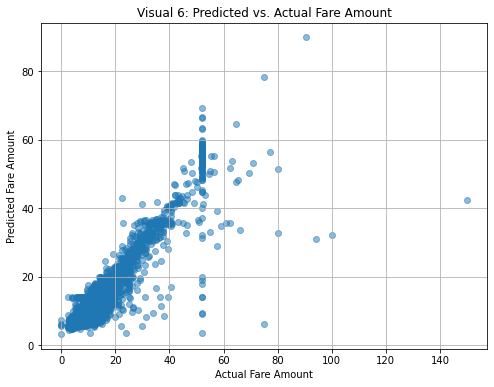

In [92]:
# Create a scatterplot to visualize predicted over actual values
plt.figure(figsize=(8, 6))
plt.scatter(results['actual'], results['predicted'], alpha=0.5)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Visual 6: Predicted vs. Actual Fare Amount')
plt.grid(True)
plt.savefig("visuals course 5/predicted_vs_actual.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

Visualize the distribution of the `residuals` using a histogram.

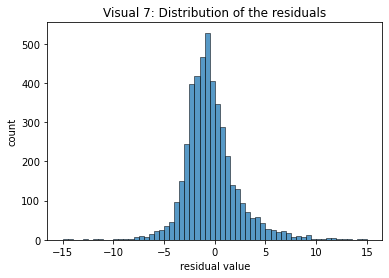

In [93]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Visual 7: Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');
plt.savefig("visuals course 5/residual_distribution.png", dpi=300, bbox_inches='tight', facecolor='white')

In [86]:
# Calculate and print mean of residuals
residual_mean = results['residual'].mean()
print("Mean of residuals:", residual_mean)

Mean of residuals: -0.1030632890432661


Create a scatterplot of `residuals` over `predicted`.

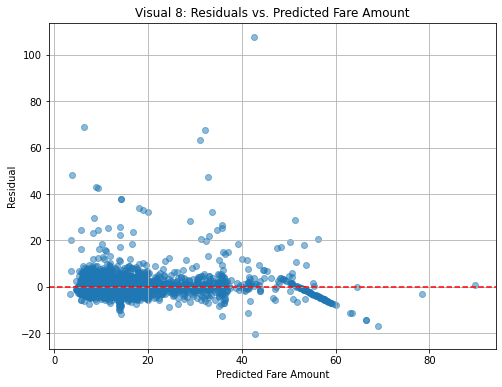

In [94]:
# Create a scatterplot of residuals over predicted values
plt.figure(figsize=(8, 6))
plt.scatter(results['predicted'], results['residual'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Line at zero residual
plt.xlabel('Predicted Fare Amount')
plt.ylabel('Residual')
plt.title('Visual 8: Residuals vs. Predicted Fare Amount')
plt.grid(True)
plt.savefig("visuals course 5/residuals_vs_predicted.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Step 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [88]:
# Output the model's coefficients in correct order with column names
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients.sort_values(ascending=False))

mean_distance      7.750670
mean_duration      2.336775
rush_hour          0.119691
passenger_count    0.006172
VendorID_2        -0.034278
VendorID_2        -0.034278
dtype: float64


What do these coefficients mean? How should they be interpreted?

The regression coefficients indicate that `mean_distance` has the strongest impact on fare amount, followed by `mean_duration`. Features such as `rush_hour`, `VendorID_2`, and `passenger_count` have only marginal effects. Coefficients refer to standardized units and not raw distances or durations.


### Final Interpretation

The model predicts taxi fares with high accuracy using just five features that are known before a ride. Most of the predictive power comes from mean_distance and mean_duration. Features like rush_hour have a small but noticeable effect, while passenger_count and VendorID_2 contribute very little.

- R² score on test data: ~0.87 → strong model performance

- Residuals are centered around 0 → no major bias

- Coefficients clearly show which features matter most for fare prediction

- The model is realistic and usable for fare estimation before the ride starts.